In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=462a8b1793fcdc6dc4959d85a78913b402963ac0bc692d03f446db28b4b53d65
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.7 GB  | Proc size: 112.3 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [ ]:
!nvidia-smi -L


GPU 0: Tesla T4 (UUID: GPU-886f6c2c-186a-8bf3-aa9f-b29617599af6)


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/datasets/train'
valid_path = '/content/drive/My Drive/datasets/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(6, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1744 images belonging to 6 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 558 images belonging to 6 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/40
 63/109 [================>.............] - ETA: 10s - loss: 0.0568 - accuracy: 0.9812

KeyboardInterrupt: ignored

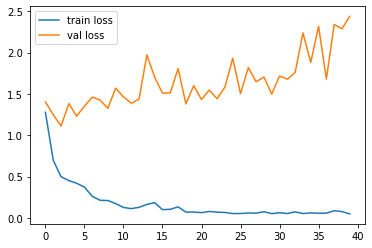

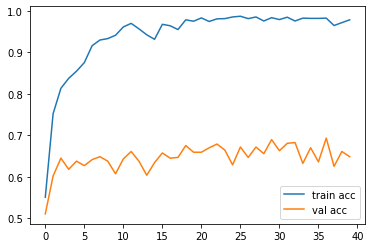

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 2, 1, 4, 3, 1, 4, 1, 3, 3, 4, 4, 2, 3, 4, 2, 3, 1, 3, 3, 3, 2,
       3, 3, 1, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 1, 3, 3, 4, 1, 3,
       4, 3, 3, 2, 4, 2, 1, 3, 4, 3, 4, 3, 2, 3, 3, 4, 0, 0, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 4, 3, 3, 2, 3, 3, 0, 4, 3, 3, 0, 3, 5, 3, 1, 2, 3,
       1, 0, 5, 4, 3, 5, 3, 0, 1, 3, 0, 1, 4, 4, 1, 2, 2, 1, 3, 4, 0, 1,
       3, 2, 3, 3, 4, 4, 4, 4, 4, 0, 1, 3, 3, 3, 1, 2, 4, 1, 3, 4, 4, 4,
       5, 1, 4, 2, 5, 3, 0, 4, 4, 4, 2, 1, 4, 3, 2, 2, 3, 0, 4, 1, 1, 3,
       3, 2, 3, 1, 5, 4, 3, 3, 1, 1, 1, 2, 1, 2, 2, 1, 3, 3, 0, 2, 3, 3,
       3, 0, 3, 0, 0, 2, 4, 3, 0, 4, 2, 4, 2, 3, 2, 4, 3, 1, 5, 4, 3, 1,
       4, 1, 3, 2, 0, 3, 1, 4, 3, 4, 3, 1, 1, 2, 3, 1, 0, 3, 1, 4, 3, 4,
       3, 1, 1, 0, 3, 3, 4, 3, 0, 2, 3, 2, 3, 3, 3, 1, 1, 4, 1, 4, 4, 3,
       4, 3, 5, 3, 4, 4, 2, 1, 3, 4, 2, 4, 5, 0, 0, 3, 3, 4, 4, 2, 2, 1,
       2, 3, 3, 3, 3, 2, 4, 2, 2, 1, 1, 3, 3, 4, 3, 3, 5, 3, 2, 3, 4, 3,
       1, 4, 3, 2, 1, 2, 4, 3, 3, 2, 4, 3, 4, 3, 0,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg16.h5')

In [ ]:
img=image.load_img('/content/drive/My Drive/datasets/test/glass/glass411.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 54.,  60.,  50.],
        [ 50.,  56.,  42.],
        [ 45.,  53.,  32.],
        ...,
        [189., 189., 199.],
        [189., 189., 199.],
        [189., 189., 199.]],

       [[ 94., 100.,  90.],
        [ 55.,  61.,  47.],
        [ 44.,  51.,  33.],
        ...,
        [189., 189., 199.],
        [189., 189., 199.],
        [189., 189., 199.]],

       [[110., 116., 106.],
        [ 95., 101.,  89.],
        [ 55.,  62.,  46.],
        ...,
        [188., 188., 198.],
        [188., 188., 198.],
        [188., 188., 198.]],

       ...,

       [[227., 229., 242.],
        [227., 229., 242.],
        [227., 229., 242.],
        ...,
        [201., 201., 213.],
        [200., 200., 212.],
        [199., 199., 211.]],

       [[228., 230., 243.],
        [228., 230., 243.],
        [228., 230., 243.],
        ...,
        [201., 201., 213.],
        [200., 200., 212.],
        [199., 199., 211.]],

       [[228., 230., 243.],
        [228., 230., 243.],
        [228., 2

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1.4340261e-15, 9.5799331e-16, 7.2812766e-01, 2.7187237e-01,
        9.4212149e-20, 8.0768359e-14]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([2])